In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

Load the Data

In [2]:
# Load the dataset
data = pd.read_csv('/Users/harshmahadik/Downloads/SEM VII/DL/Dataset/dress_rental_prices.csv')
data.head(5)

,Unnamed: 0,ID,Name,Brand,Colour,Catagories,Price
0,0,74416,Runway stripe dress,Stella McCartney,beige,dresses,111
1,1,73815,Reformation Kourtney Dress,Reformation,beige,dresses,50
2,2,73801,Ivory Viola bridal dress,Ghost,beige,dresses,75
3,3,73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37
4,4,73605,Ellen,RIXO,beige,dresses,47


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29997 entries, 0 to 29996
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  29997 non-null  int64 
 1   ID          29997 non-null  int64 
 2   Name        29995 non-null  object
 3   Brand       29997 non-null  object
 4   Colour      29997 non-null  object
 5   Catagories  29883 non-null  object
 6   Price       29997 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.6+ MB


Inspect the Data

In [4]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0      0
ID              0
Name            2
Brand           0
Colour          0
Catagories    114
Price           0
dtype: int64


In [5]:
# Get summary statistics
print(data.describe())

         Unnamed: 0            ID         Price
count  29997.000000  29997.000000  29997.000000
mean   14998.000000  42548.336400     61.668800
std     8659.532349  19867.282746     38.138688
min        0.000000    122.000000     11.000000
25%     7499.000000  27338.000000     40.000000
50%    14998.000000  42902.000000     51.000000
75%    22497.000000  60275.000000     69.000000
max    29996.000000  75024.000000    793.000000


Data Cleaning

In [6]:
# Drop unnecessary columns
data.drop(['Unnamed: 0', 'ID', 'Name'], axis=1, inplace=True)

In [7]:
# Handle missing values - drop rows with missing categories or fill them
data.dropna(inplace=True)

In [8]:
# Label encode the categorical features
labelencoder = LabelEncoder()
data['Brand'] = labelencoder.fit_transform(data['Brand'])
data['Colour'] = labelencoder.fit_transform(data['Colour'])
data['Catagories'] = labelencoder.fit_transform(data['Catagories'])


In [9]:
# Define features and target
X = data[['Brand', 'Colour', 'Catagories']]
y = data['Price']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize and train the XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [12]:
# Make predictions
y_pred = model.predict(X_test)

In [13]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [14]:

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Root Mean Squared Error (RMSE): 33.68344150312436
R-squared (R2): 0.2391793804013006


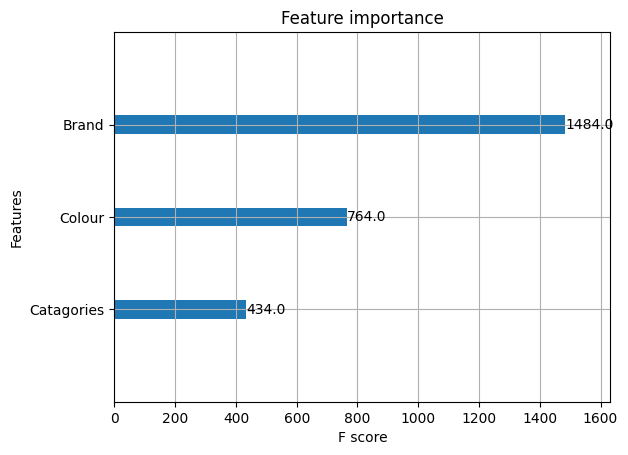

In [15]:
# Feature importance plot
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()